In [39]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

In [40]:
# Loads training and testing data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [41]:
# Prepares training data
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255
train_labels = to_categorical(train_labels)

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255
test_labels = to_categorical(test_labels)

# Splits training data further into training and validation data sets
val_images = train_images[50000:]
train_images = train_images[:50000]

val_labels = train_labels[50000:]
train_labels = train_labels[:50000]

In [42]:
# Creates model
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=((28*28),)))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
# Trains model
history = model.fit(train_images, train_labels, epochs=5, batch_size=128,
                   validation_data=(val_images, val_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 3s 61us/step - loss: 0.2851 - accuracy: 0.9171 - val_loss: 0.1483 - val_accuracy: 0.9578
Epoch 2/5
50000/50000 [==============================] - 3s 61us/step - loss: 0.1162 - accuracy: 0.9650 - val_loss: 0.1085 - val_accuracy: 0.9676
Epoch 3/5
50000/50000 [==============================] - 3s 62us/step - loss: 0.0765 - accuracy: 0.9774 - val_loss: 0.0859 - val_accuracy: 0.9752
Epoch 4/5
50000/50000 [==============================] - 3s 60us/step - loss: 0.0549 - accuracy: 0.9837 - val_loss: 0.0809 - val_accuracy: 0.9759
Epoch 5/5
50000/50000 [==============================] - 3s 59us/step - loss: 0.0414 - accuracy: 0.9876 - val_loss: 0.0756 - val_accuracy: 0.9788


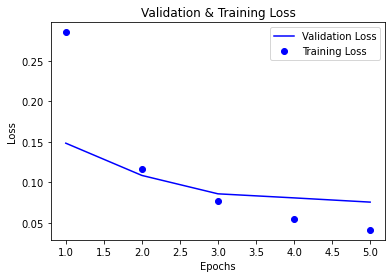

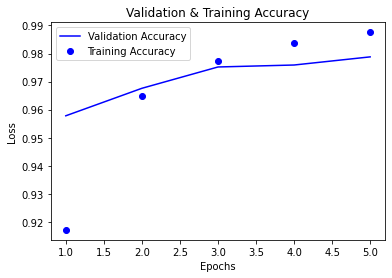

In [46]:
# Evaluates training and validation performance

history_dict = history.history

epochs = range(1, len(history_dict["accuracy"]) + 1)

val_loss = history_dict["val_loss"]
train_loss = history_dict["loss"]

val_accuracy = history_dict["val_accuracy"]
train_accuracy = history_dict["accuracy"]

plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.plot(epochs, train_loss, "bo", label = "Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Validation & Training Loss")
plt.show()

plt.plot(epochs, val_accuracy, "b", label = "Validation Accuracy")
plt.plot(epochs, train_accuracy, "bo", label = "Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Validation & Training Accuracy")
plt.show()

In [47]:
# Combines back both training and validation and retrains final model

train_images = np.append(train_images, val_images, axis=0)
train_labels = np.append(train_labels, val_labels, axis=0)

model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.0388 - accuracy: 0.9889
Epoch 2/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.0297 - accuracy: 0.9911
Epoch 3/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.0227 - accuracy: 0.9934
Epoch 4/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.0165 - accuracy: 0.9955
Epoch 5/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.0132 - accuracy: 0.9965


In [49]:
# Evaluates model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Testing Loss: ", test_loss, ", Testing Accuracy: ", test_accuracy)

10000/10000 [==============================] - 0s 48us/step
Testing Loss:  0.06706174692784916 , Testing Accuracy:  0.9818000197410583
